## Dependencies

In [183]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mplcyberpunk
import datetime
import yfinance as yf
import pandas_datareader as pdr
import pandas_datareader.data as web
import bokeh
import hvplot.pandas
from bokeh.sampledata.penguins import data as df
import warnings
warnings.filterwarnings('ignore')
from pandas.plotting import scatter_matrix
import ipywidgets as widgets


## Extracting data via web.DataReader

In [2]:
# Establish start and end date for analysis. Customizable.
start = datetime.datetime(2021,9,15)
end = datetime.datetime(2022,9,15)

# Extract first stock with pandas datareader method. Replace ticker name if you'd like. Excludes dividends/stock splits
amrc = web.DataReader("AMRC", "yahoo", start,end)
amrc

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-09-15,70.580002,69.080002,70.000000,70.010002,476700,70.010002
2021-09-16,70.599998,65.589996,69.680000,65.599998,439400,65.599998
2021-09-17,67.669998,65.309998,66.169998,66.489998,868100,66.489998
2021-09-20,65.419998,62.240002,64.949997,63.070000,435900,63.070000
2021-09-21,63.860001,62.259998,63.860001,62.439999,567600,62.439999
...,...,...,...,...,...,...
2022-09-09,76.260002,74.339996,75.110001,74.739998,326600,74.739998
2022-09-12,74.980003,69.470001,74.480003,73.070000,379200,73.070000
2022-09-13,73.379997,69.010002,69.290001,72.330002,242200,72.330002


In [3]:
# Amrc_close to be used later in moving averages table/plot

amrc_close = amrc[['Close']] # extract indicator of your choosing
amrc_close.head(4)

,Close
Date,
2021-09-15,70.010002
2021-09-16,65.599998
2021-09-17,66.489998
2021-09-20,63.070000


In [4]:
# Extract second stock ith pandas datareader method
on = web.DataReader("ON", "yahoo", start,end)
on.head(4)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-09-15,49.230000,47.570000,48.240002,49.209999,5534000,49.209999
2021-09-16,49.709999,48.380001,48.930000,49.400002,5785300,49.400002
2021-09-17,49.400002,48.090000,49.290001,48.889999,7268000,48.889999
2021-09-20,47.680000,46.759998,47.310001,47.669998,5472600,47.669998


In [5]:
# On_close to be used later in moving averages table/plot

on_close = on[['Close']] # extract indicator of your choosing
on_close.head(4)

,Close
Date,
2021-09-15,49.209999
2021-09-16,49.400002
2021-09-17,48.889999
2021-09-20,47.669998


In [6]:
# Extract third stock with pandas datareader method
stem = web.DataReader("STEM", "yahoo", start,end)
stem.head(4)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-09-15,22.459999,21.740,22.250000,22.360001,2374000,22.360001
2021-09-16,23.885000,22.045,22.299999,23.740000,2398100,23.740000
2021-09-17,25.980000,24.090,24.309999,25.940001,8552600,25.940001
2021-09-20,25.010000,23.680,24.440001,24.320000,2887600,24.320000


In [7]:
# STEM_close to be used later in moving averages table/plot

stem_close = stem[['Close']]
stem_close.head(4)

,Close
Date,
2021-09-15,22.360001
2021-09-16,23.740000
2021-09-17,25.940001
2021-09-20,24.320000


## Method 2: Extracting data via yf.Ticker module and history method

In [8]:
# Optional method of data extraction, this method includes dividends and stock splits
amrc_2 = yf.Ticker("amrc")
amrc_2

# Extract dates, set the interval
amrc_2 = amrc_2.history(start="2021-09-15", end="2022-09-15", interval="1d")
amrc_2.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-09-13,70.379997,70.379997,67.699997,68.230003,333900,0,0
2021-09-14,69.010002,70.800003,68.970001,70.300003,399800,0,0
2021-09-15,70.000000,70.580002,69.080002,70.010002,476700,0,0
2021-09-16,69.680000,70.599998,65.589996,65.599998,439400,0,0
2021-09-17,66.169998,67.669998,65.309998,66.489998,868100,0,0


In [9]:
on_2 = yf.Ticker("amrc")
on_2

# Extract dates, set the interval
on_2 = on_2.history(start="2021-09-15", end="2022-09-15", interval="1d")
on_2.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-09-13,70.379997,70.379997,67.699997,68.230003,333900,0,0
2021-09-14,69.010002,70.800003,68.970001,70.300003,399800,0,0
2021-09-15,70.000000,70.580002,69.080002,70.010002,476700,0,0
2021-09-16,69.680000,70.599998,65.589996,65.599998,439400,0,0
2021-09-17,66.169998,67.669998,65.309998,66.489998,868100,0,0


<AxesSubplot:title={'center':'AMRC - Close'}, xlabel='Date'>

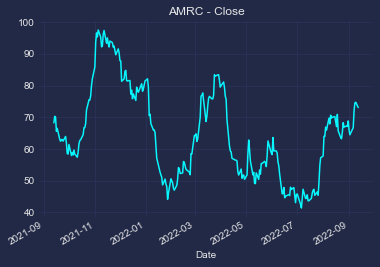

In [11]:
# test plotting feature on a stock dataframe

import mplcyberpunk
from matplotlib import style
style.use('cyberpunk')
plt.title('AMRC - Close')
amrc_2['Close'].plot()

## Stock Open Prices

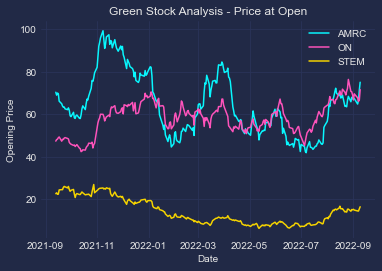

In [12]:
# Dataframe creation for each stock from csv format
amrc_df = pd.read_csv('AMRC.csv') 
on_df = pd.read_csv('ON.csv') 
stem_df= pd.read_csv('STEM.csv') 
 
# establish joint stock dataframe
stocks_df = pd.DataFrame()

# use date from amrc_df data to help establish joint df 'date' column
stocks_df['date'] = pd.to_datetime(amrc_df['Date'])

# create individual stock columns using data from 'Open' data only
stocks_df['AMRC'] = amrc_df['Open']
stocks_df['ON'] = on_df['Open']
stocks_df['STEM'] = stem_df['Open']

# plot open vs date
plt.plot(stocks_df['date'], stocks_df['AMRC'])
plt.plot(stocks_df['date'], stocks_df['ON'])
plt.plot(stocks_df['date'], stocks_df['STEM'])
 
# insert legends
plt.legend(labels=['AMRC','ON','STEM'])

# grid lines
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Opening Price')
plt.title('Green Stock Analysis - Price at Open')
import mplcyberpunk
from matplotlib import style
style.use('cyberpunk')
plt.show()

# one variable analysis (open), multiple categories (amrc, on, stem) - complex method
# also, plt.plot formatting with info inside parentheses (can't do figsize)

### AMRC has the highest open prices when compared to the other two.

## AMRC - Open, Close, High, Low 

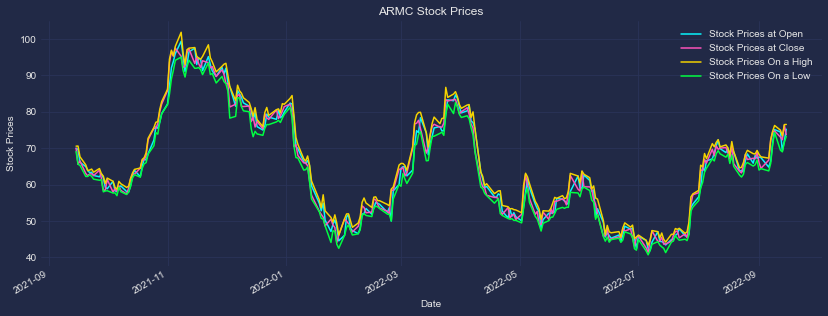

In [13]:
# compare open/close and high/low for AMRC (multi variable analysis)
amrc['Open'].plot(label= 'Stock Prices at Open', figsize=(14,5))
amrc['Close'].plot(label= 'Stock Prices at Close')
amrc['High'].plot(label= 'Stock Prices On a High')
amrc['Low'].plot(label= 'Stock Prices On a Low')
plt.legend()
plt.title('ARMC Stock Prices')
plt.ylabel('Stock Prices')
plt.show()

# also, plot method with desired columns preceding 'plot' and labels inside.

## Method 2: Plotting - column within parentheses

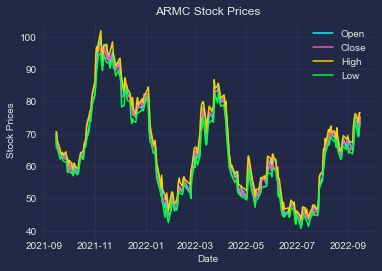

In [14]:
# secondary plotting method for amrc data. Shows prior method better b/c 'figsize' can be applied, whereas this does not allow
plt.plot(amrc['Open'])
plt.plot(amrc['Close'])
plt.plot(amrc['High'])
plt.plot(amrc['Low'])

# insert legend
plt.legend(labels=['Open','Close','High', 'Low'])

plt.xlabel('Date')
plt.ylabel('Stock Prices')
plt.title('ARMC Stock Prices')
plt.show()

## ON - Open, Close, High, Low 

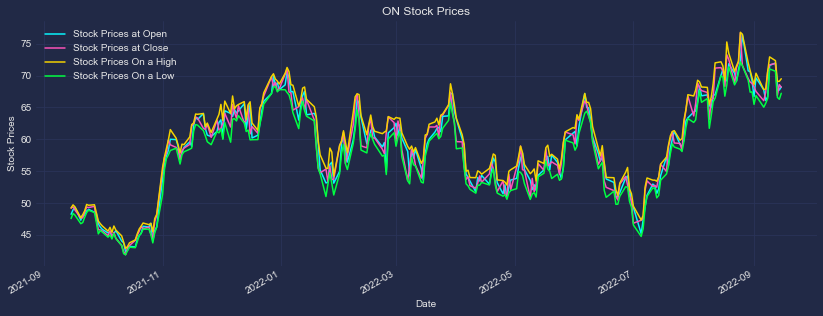

In [15]:
on['Open'].plot(label= 'Stock Prices at Open', figsize=(14,5))
on['Close'].plot(label= 'Stock Prices at Close')
on['High'].plot(label= 'Stock Prices On a High')
on['Low'].plot(label= 'Stock Prices On a Low')

# insert legend
plt.legend()

plt.title('ON Stock Prices')
plt.ylabel('Stock Prices')
import mplcyberpunk
from matplotlib import style
style.use('cyberpunk')
plt.show()

## STEM - Open, Close, High, Low 

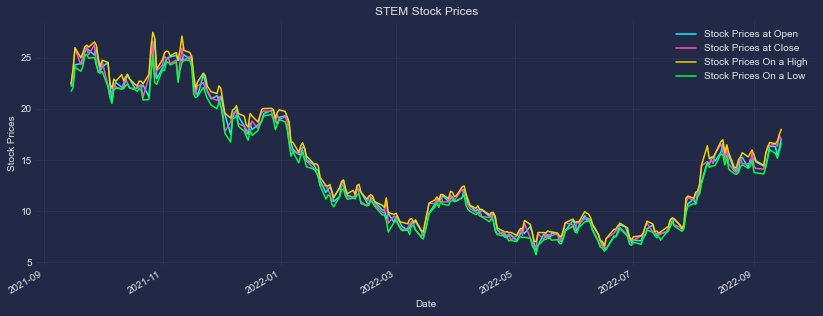

In [16]:
stem['Open'].plot(label= 'Stock Prices at Open', figsize=(14,5))
stem['Close'].plot(label= 'Stock Prices at Close')
stem['High'].plot(label= 'Stock Prices On a High')
stem['Low'].plot(label= 'Stock Prices On a Low')

# insert legend
plt.legend()

plt.title('STEM Stock Prices')
plt.ylabel('Stock Prices')
import mplcyberpunk
from matplotlib import style
style.use('cyberpunk')
plt.show()

## Stock Close Prices

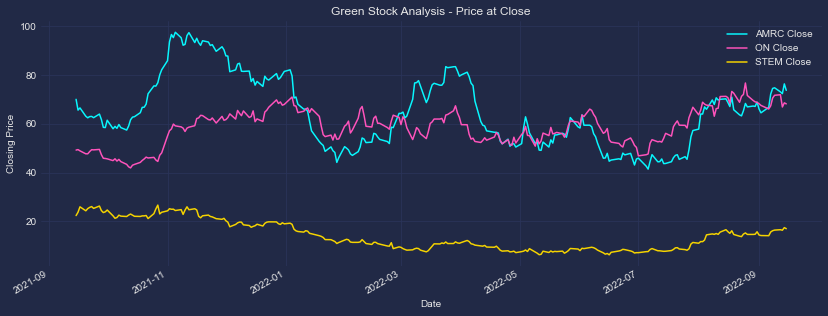

In [17]:
# one variable analysis (close), multiple categories (amrc, on, stem)

amrc['Close'].plot(label= 'AMRC Close', figsize=(14,5))
on['Close'].plot(label= 'ON Close')
stem['Close'].plot(label= 'STEM Close')

plt.title('Green Stock Analysis - Price at Close')
plt.ylabel('Closing Price')
plt.xlabel('Date')
plt.legend()
plt.show()

### AMRC has the highest close prices when compared to the other two.

## Stock Volume

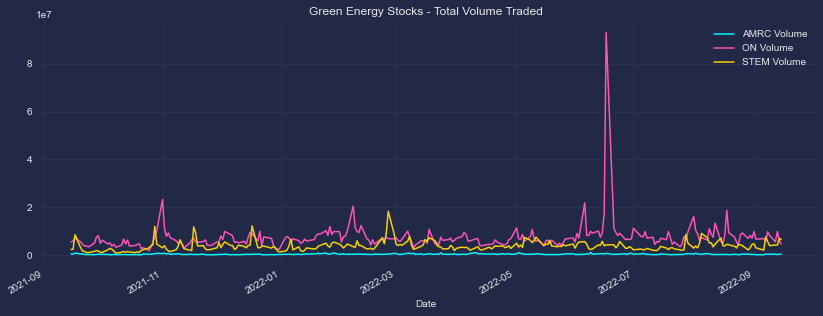

In [18]:
# Volume analysis for all three stocks

amrc['Volume'].plot(label= 'AMRC Volume', figsize=(14,5))
on['Volume'].plot(label= 'ON Volume')
stem['Volume'].plot(label= 'STEM Volume')

plt.title('Green Energy Stocks - Total Volume Traded')
plt.xlabel('Date')
plt.legend()
plt.show()

### Despite having the highest open and close prices, AMRC is the lowest traded by volume.
### ON is the highest traded by volume.

In [19]:
# if a stock with a high trading volume is rising, it means there is buying pressure, as investors demand pushes
# the stock to higher and higher prices. One the other hand, if the price of a stock with a high trading volume 
# is falling, it means more investors are selling their shares

## Total Traded

In [20]:
# Multiplying opening price and each stocks' volume to get the total traded (money). 
# This will be added as a column to each df

amrc['Total Traded'] = amrc['Open']*amrc['Volume']
on['Total Traded'] = on['Open']*amrc['Volume']
stem['Total Traded'] = stem['Open']*amrc['Volume']

## Plot Total Traded

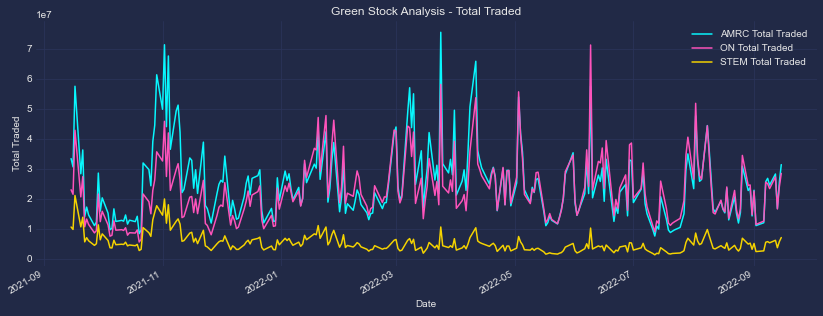

In [22]:
amrc['Total Traded'].plot(label='AMRC Total Traded', figsize =(14,5))
on['Total Traded'].plot(label='ON Total Traded')
stem['Total Traded'].plot(label='STEM Total Traded')

plt.title('Green Stock Analysis - Total Traded')
plt.ylabel('Total Traded')
plt.xlabel('Date')
plt.legend()
plt.show()

# time series graph shows that there is a large amt of TT for ON towards end of June 22; AMRC in 04/22; STEM in 11/21

## Argmax

In [76]:
# Argmax - domain of some function (TT = open x volume), index at which the function values are maximized 
# AMRC argmax

amrc['Total Traded'].argmax()

132

In [77]:
# ON argmax

on['Total Traded'].argmax()

185

In [78]:
# STEM argmax

stem['Total Traded'].argmax()

2

In [79]:
# Use iloc isolating index of argmax() data

amrc.iloc[[amrc['Total Traded'].argmax()]

,High,Low,Open,Close,Volume,Adj Close,Total Traded,MA50,MA100,Daily Percentage Change,Cumulative Return
Date,,,,,,,,,,,
2022-03-24,86.730003,79.25,79.480003,83.410004,948700,83.410004,7.540268e+07,59.9196,72.3113,0.084514,0.191401


In [82]:
on.iloc[[on['Total Traded'].argmax()]]

,High,Low,Open,Close,Volume,Adj Close,Total Traded,MA50,MA100,Daily Percentage Change,Cumulative Return
Date,,,,,,,,,,,
2022-06-09,64.809998,62.610001,63.150002,62.66,9903200,62.66,7.116374e+07,56.6014,9.681,-0.018022,0.273318


In [83]:
stem.iloc[[stem['Total Traded'].argmax()]]

,High,Low,Open,Close,Volume,Adj Close,Total Traded,MA50,Daily Percentage Change,Cumulative Return
Date,,,,,,,,,,
2021-09-17,25.98,24.09,24.309999,25.940001,8552600,25.940001,2.110351e+07,NaN,0.092671,-0.006503


## Moving Averages
### MA are indicators used as a technique for trading by filtering out short-term price fluctuations by taking the average price. It indicates trend direction and determines resistance levels. 
### Trading signal: when asset prices crosses over (is greater)  the MA. Therefore, MA are a popular strategy for entries/exits.

In [27]:
# AMRC
# Tabular format of moving averages

short_window = 50
long_window = 100

# Calculation of each moving average
amrc_close['SMA50'] = amrc_close['Close'].rolling(window=short_window).mean()
amrc_close['SMA100'] = amrc_close['Close'].rolling(window=long_window).mean()
amrc_close['Trading Signal'] = 0.0

# Define trading signal as 0 or 1,
# where 0 = SMA50 < SMA100
# where 1 = SMA50 > SMA100

amrc_close['Trading Signal'][short_window:] = np.where(
   amrc_close['SMA50'][short_window:] > amrc_close['SMA100'][short_window:], 1.0, 0.0)

# Calculate timepoints at which a position should be taken, 1 or -1
amrc_close['Entry/Exit'] = amrc_close['Trading Signal'].diff()
amrc_close.tail(8)

,Close,SMA50,SMA100,Trading Signal,Entry/Exit
Date,,,,,
2022-09-06,66.739998,56.923400,55.2875,1.0,0.0
2022-09-07,72.160004,57.409401,55.4184,1.0,0.0
2022-09-08,74.500000,57.990001,55.5926,1.0,0.0
2022-09-09,74.739998,58.623000,55.7750,1.0,0.0
2022-09-12,73.070000,59.173200,55.9409,1.0,0.0
2022-09-13,72.330002,59.702401,56.1021,1.0,0.0
2022-09-14,76.339996,60.376800,56.3370,1.0,0.0
2022-09-15,73.699997,61.022800,56.5561,1.0,0.0


In [28]:
# ON

short_window = 50
long_window = 100

# Calculation of each moving average
on_close['SMA50'] = on_close['Close'].rolling(window=short_window).mean()
on_close['SMA100'] = on_close['Close'].rolling(window=long_window).mean()
on_close['Trading Signal'] = 0.0

# Define trading signal as 0 or 1,
# where 0 = SMA50 < SMA100
# where 1 = SMA50 > SMA100

on_close['Trading Signal'][short_window:] = np.where(
   on_close['SMA50'][short_window:] > on_close['SMA100'][short_window:], 1.0, 0.0)

# Calculate timepoints at which a position should be taken, 1 or -1
on_close['Entry/Exit'] = on_close['Trading Signal'].diff()
on_close.tail(8)


,Close,SMA50,SMA100,Trading Signal,Entry/Exit
Date,,,,,
2022-09-06,66.050003,62.4558,59.2813,1.0,0.0
2022-09-07,67.360001,62.7196,59.4124,1.0,0.0
2022-09-08,70.550003,63.0744,59.5853,1.0,0.0
2022-09-09,71.669998,63.4854,59.7563,1.0,0.0
2022-09-12,71.900002,63.9172,59.9115,1.0,0.0
2022-09-13,66.870003,64.3178,60.0262,1.0,0.0
2022-09-14,68.570000,64.7432,60.1793,1.0,0.0
2022-09-15,68.150002,65.1540,60.3430,1.0,0.0


In [29]:
# STEM

short_window = 50
long_window = 100

# Calculation of each moving average
stem_close['SMA50'] = stem_close['Close'].rolling(window=short_window).mean()
stem_close['SMA100'] = stem_close['Close'].rolling(window=long_window).mean()
stem_close['Trading Signal'] = 0.0

# Define trading signal as 0 or 1,
# where 0 = SMA50 < SMA100
# where 1 = SMA50 > SMA100

stem_close['Trading Signal'][short_window:] = np.where(
   stem_close['SMA50'][short_window:] > stem_close['SMA100'][short_window:], 1.0, 0.0)

# Calculate timepoints at which a position should be taken, 1 or -1
stem_close['Entry/Exit'] = stem_close['Trading Signal'].diff()
stem_close.tail(8)

,Close,SMA50,SMA100,Trading Signal,Entry/Exit
Date,,,,,
2022-09-06,14.110000,11.4622,9.7237,1.0,0.0
2022-09-07,15.630000,11.6178,9.7788,1.0,0.0
2022-09-08,16.160000,11.7894,9.8458,1.0,0.0
2022-09-09,16.400000,11.9772,9.9161,1.0,0.0
2022-09-12,16.559999,12.1652,9.9837,1.0,0.0
2022-09-13,16.350000,12.3492,10.0568,1.0,0.0
2022-09-14,17.420000,12.5462,10.1495,1.0,0.0
2022-09-15,16.980000,12.7340,10.2415,1.0,0.0


## Moving Averages - AMRC Plot

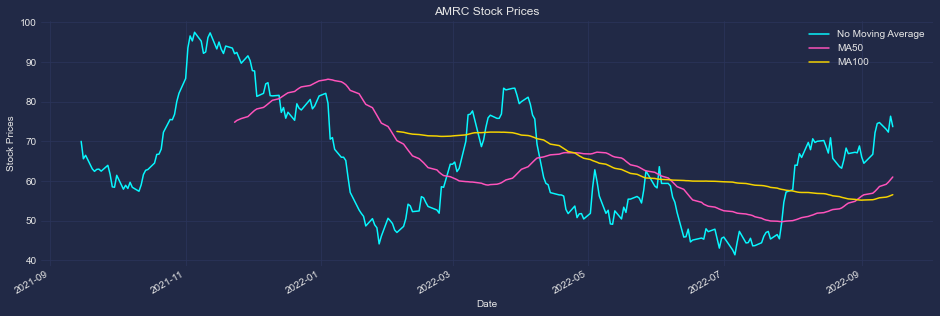

In [30]:
# Smooth out the date with moving average of 50 and 100 on AMRC stock (means)

# new column 'MA50' with formula following '='; plotting new column in graph
amrc['MA50'] = amrc['Close'].rolling(50).mean()

# plotting AMRC 'Close' as 'No Moving Average'
amrc['Close'].plot(label='No Moving Average', figsize=(16,5))

# new column 'MA100' and plotting new column in graph
amrc['MA100'] = amrc['Close'].rolling(100).mean()

amrc['MA50'].plot(label='MA50')
amrc['MA100'].plot(label='MA100')
plt.title('AMRC Stock Prices')
plt.xlabel('Date')
plt.ylabel('Stock Prices')
plt.legend()
plt.show()

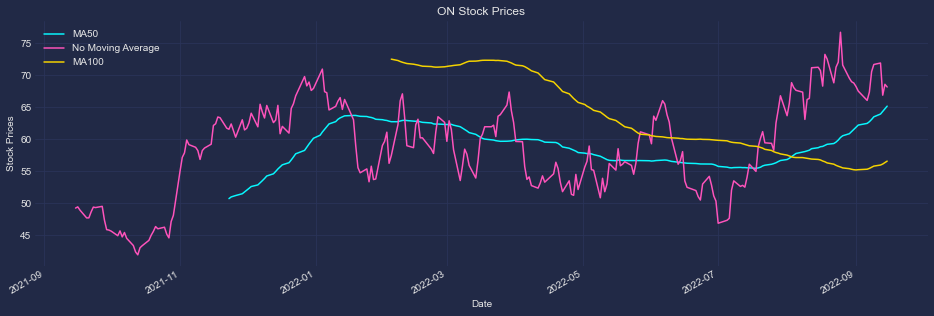

In [31]:
# ON

on['MA50'] = on['Close'].rolling(50).mean()
on['MA50'].plot(label='MA50')

# plotting AMRC 'Close' as 'No Moving Average'
on['Close'].plot(label='No Moving Average', figsize=(16,5))

# new column 'MA100' and plotting new column in graph
on['MA100'] = amrc['Close'].rolling(100).mean()
on['MA100'].plot(label='MA100')

# insert legend
plt.legend()
plt.title('ON Stock Prices')
plt.xlabel('Date')
plt.ylabel('Stock Prices')
plt.show()

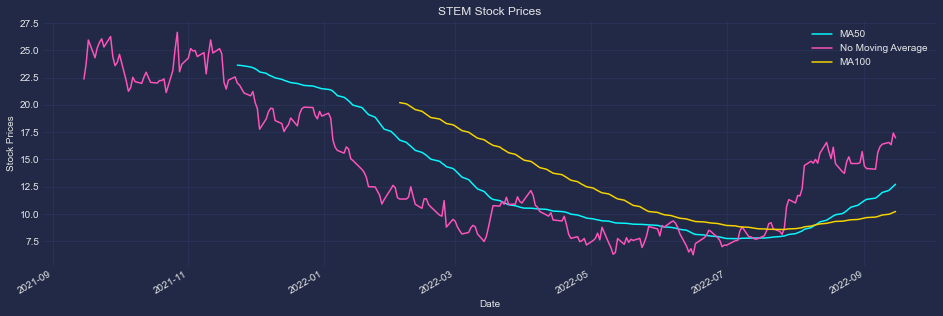

In [32]:
# STEM

stem['MA50'] = stem['Close'].rolling(50).mean()
stem['MA50'].plot(label='MA50')

# plotting AMRC 'Close' as 'No Moving Average'
stem['Close'].plot(label='No Moving Average', figsize=(16,5))

# new column 'MA100' and plotting new column in graph
on['MA100'] = stem['Close'].rolling(100).mean()
on['MA100'].plot(label='MA100')

# insert legend
plt.legend()
plt.title('STEM Stock Prices')
plt.xlabel('Date')
plt.ylabel('Stock Prices')
plt.show()

## Moving Average Visualization with HVPlot package

In [33]:
#  AMRC: exit position relative to close price

exit = amrc_close[amrc_close['Entry/Exit'] == -1.0]['Close'].hvplot.scatter(
    color='red',
    legend=False,
    ylabel='Stock Price',
    width=1000,
    height=550
)
# Visualize entry position relative to close price
entry = amrc_close[amrc_close['Entry/Exit'] == 1.0]['Close'].hvplot.scatter(
    color='green',
    legend=False,
    ylabel='Stock Price',
    width=1000,
    height=550
)
# Visualize close price for the investment
security_close = amrc_close[['Close']].hvplot(
    line_color='lightgray',
    ylabel='Stock Price',
    width=1000,
    height=550
)
# Visualize moving averages
moving_avgs = amrc_close[['SMA50', 'SMA100']].hvplot(
    ylabel='Stock Price',
    width=1000,
    height=550
)
# Overlay plots
entry_exit_plot = security_close * moving_avgs * entry * exit
entry_exit_plot.opts(xaxis=None)

:Overlay
   .Curve.I          :Curve   [Date]   (Close)
   .NdOverlay.I      :NdOverlay   [Variable]
      :Curve   [Date]   (value)
   .Scatter.Close.I  :Scatter   [Date]   (Close)
   .Scatter.Close.II :Scatter   [Date]   (Close)

In [34]:
# ON: exit position relative to close price

exit = on_close[on_close['Entry/Exit'] == -1.0]['Close'].hvplot.scatter(
    color='red',
    legend=False,
    ylabel='Stock Price',
    width=1000,
    height=550
)
# Visualize entry position relative to close price
entry = on_close[on_close['Entry/Exit'] == 1.0]['Close'].hvplot.scatter(
    color='green',
    legend=False,
    ylabel='Stock Price',
   width=1000,
    height=550
)
# Visualize close price for the investment
security_close = on_close[['Close']].hvplot(
    line_color='lightgray',
    ylabel='Stock Price',
    width=1000,
   height=550
)
# Visualize moving averages
moving_avgs = on_close[['SMA50', 'SMA100']].hvplot(
    ylabel='Stock Price',
    width=1000,
    height=550
)
# Overlay plots
entry_exit_plot = security_close * moving_avgs * entry * exit
entry_exit_plot.opts(xaxis=None)

:Overlay
   .Curve.I          :Curve   [Date]   (Close)
   .NdOverlay.I      :NdOverlay   [Variable]
      :Curve   [Date]   (value)
   .Scatter.Close.I  :Scatter   [Date]   (Close)
   .Scatter.Close.II :Scatter   [Date]   (Close)

In [35]:
# STEM: exit position relative to close price

exit = stem_close[stem_close['Entry/Exit'] == -1.0]['Close'].hvplot.scatter(
    color='red',
    legend=False,
    ylabel='Stock Price',
    width=1000,
    height=550
)
# Visualize entry position relative to close price
entry = stem_close[stem_close['Entry/Exit'] == 1.0]['Close'].hvplot.scatter(
    color='green',
    legend=False,
    ylabel='Stock Price',
   width=1000,
    height=550
)
# Visualize close price for the investment
security_close = stem_close[['Close']].hvplot(
    line_color='lightgray',
    ylabel='Stock Price',
    width=1000,
   height=550
)
# Visualize moving averages
moving_avgs = stem_close[['SMA50', 'SMA100']].hvplot(
    ylabel='Stock Price',
    width=1000,
    height=550
)
# Overlay plots
entry_exit_plot = security_close * moving_avgs * entry * exit
entry_exit_plot.opts(xaxis=None)

:Overlay
   .Curve.I          :Curve   [Date]   (Close)
   .NdOverlay.I      :NdOverlay   [Variable]
      :Curve   [Date]   (value)
   .Scatter.Close.I  :Scatter   [Date]   (Close)
   .Scatter.Close.II :Scatter   [Date]   (Close)

## Daily Percentage Change

### DPC is a technical analysis tool used to measure volatility (distribution). DPC is the change in a value of a stock over a single trading day. The larger the value (positive or negative, the more volatile the stock is.

### 2-3% (or 0.02 / 0.03 is considered high volatility, a.k.a more risk)

### Formula:  rt = Pt/Pt-1 -1 

In [36]:
# AMRC: Building a column from Close data within the dataframe 

amrc['Daily Percentage Change'] = (amrc['Close']/amrc['Close'].shift(1)) - 1
amrc.head()

,High,Low,Open,Close,Volume,Adj Close,Total Traded,MA50,MA100,Daily Percentage Change
Date,,,,,,,,,,
2021-09-15,70.580002,69.080002,70.000000,70.010002,476700,70.010002,3.336900e+07,NaN,NaN,NaN
2021-09-16,70.599998,65.589996,69.680000,65.599998,439400,65.599998,3.061739e+07,NaN,NaN,-0.062991
2021-09-17,67.669998,65.309998,66.169998,66.489998,868100,66.489998,5.744218e+07,NaN,NaN,0.013567
2021-09-20,65.419998,62.240002,64.949997,63.070000,435900,63.070000,2.831170e+07,NaN,NaN,-0.051436
2021-09-21,63.860001,62.259998,63.860001,62.439999,567600,62.439999,3.624694e+07,NaN,NaN,-0.009989


In [37]:
on['Daily Percentage Change'] = (on['Close']/on['Close'].shift(1)) - 1
on.head(4)

,High,Low,Open,Close,Volume,Adj Close,Total Traded,MA50,MA100,Daily Percentage Change
Date,,,,,,,,,,
2021-09-15,49.230000,47.570000,48.240002,49.209999,5534000,49.209999,2.299601e+07,NaN,NaN,NaN
2021-09-16,49.709999,48.380001,48.930000,49.400002,5785300,49.400002,2.149984e+07,NaN,NaN,0.003861
2021-09-17,49.400002,48.090000,49.290001,48.889999,7268000,48.889999,4.278865e+07,NaN,NaN,-0.010324
2021-09-20,47.680000,46.759998,47.310001,47.669998,5472600,47.669998,2.062243e+07,NaN,NaN,-0.024954


In [38]:
stem['Daily Percentage Change'] = (stem['Close']/stem['Close'].shift(1)) - 1
stem.head(4)

,High,Low,Open,Close,Volume,Adj Close,Total Traded,MA50,Daily Percentage Change
Date,,,,,,,,,
2021-09-15,22.459999,21.740,22.250000,22.360001,2374000,22.360001,1.060658e+07,NaN,NaN
2021-09-16,23.885000,22.045,22.299999,23.740000,2398100,23.740000,9.798620e+06,NaN,0.061717
2021-09-17,25.980000,24.090,24.309999,25.940001,8552600,25.940001,2.110351e+07,NaN,0.092671
2021-09-20,25.010000,23.680,24.440001,24.320000,2887600,24.320000,1.065340e+07,NaN,-0.062452


,AMRC Daily Return,ON Daily Return,STEM Daily Return
Date,,,
2021-09-15,NaN,NaN,NaN
2021-09-16,-0.062991,0.003861,0.061717
2021-09-17,0.013567,-0.010324,0.092671
2021-09-20,-0.051436,-0.024954,-0.062452
2021-09-21,-0.009989,0.000210,0.037007


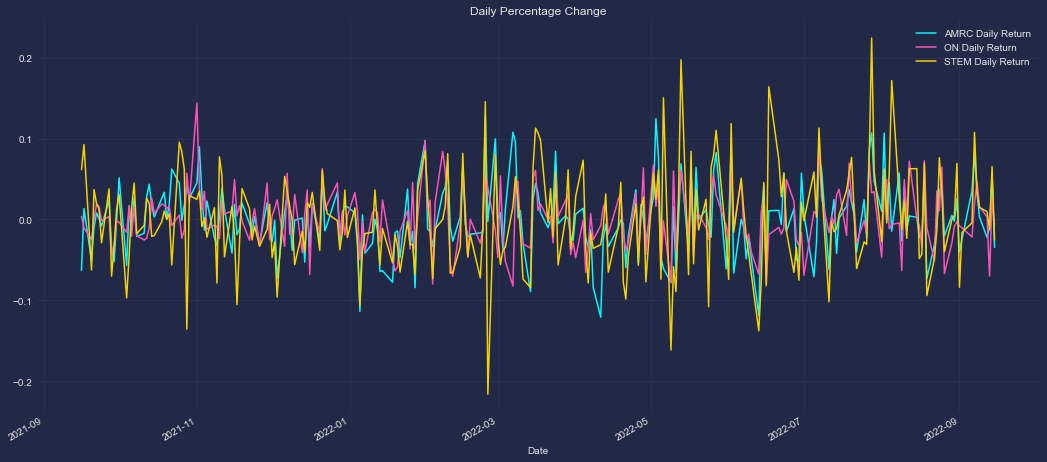

In [133]:
# after building columns, build dataframe using concat method for each stocks' DCP column

dcp_df = pd.concat([amrc['Daily Percentage Change'], on['Daily Percentage Change'], stem['Daily Percentage Change']],
                   axis=1)
dcp_df.columns = ['AMRC Daily Return', 'ON Daily Return', 'STEM Daily Return']
dcp_df.plot(figsize=(18,8), title='Daily Percentage Change')
dcp_df.head()


<AxesSubplot:title={'center':'Daily Percentage Change'}, ylabel='Density'>

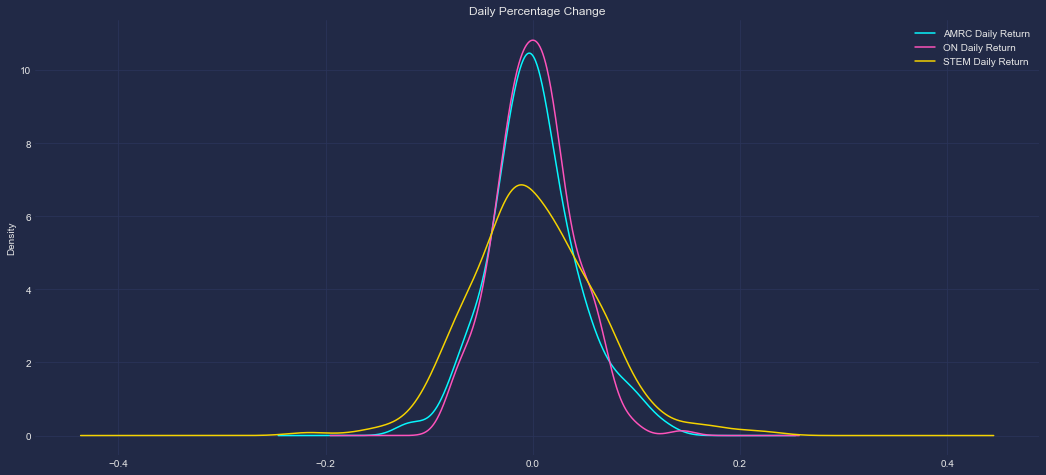

In [94]:
# Compare previous graph with a diagram down integrating KDE (kernel density estimate)
# KDE is normalized, histogram is not. Comparison of the two can be used for verification.

dcp_df.plot(kind='kde', figsize=(18,8), title='Daily Percentage Change')

## Histogram

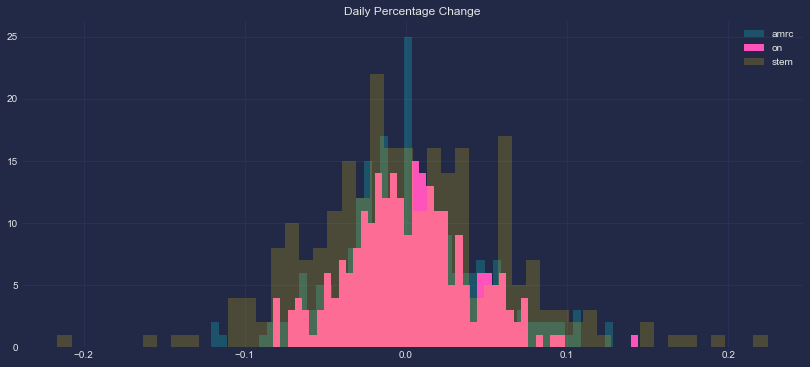

In [42]:
# combine these on same graph
amrc['Daily Percentage Change'].hist(bins=50, label='amrc', alpha=0.2, figsize = (14,6))
on['Daily Percentage Change'].hist(bins=50, label='on')
stem['Daily Percentage Change'].hist(bins=50, label='stem', alpha=0.2)
plt.title('Daily Percentage Change') 
plt.legend()

## Boxplot

<AxesSubplot:title={'center':'Daily Percentage Change'}>

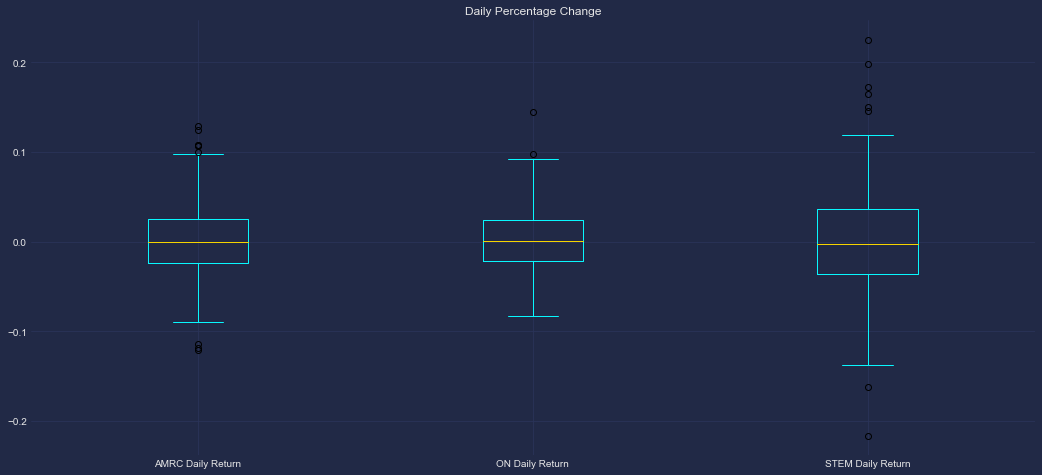

In [97]:
dcp_df.plot(kind='box', figsize=(18,8), title='Daily Percentage Change')
# stem is the most volatile

## Present: For-loop and pct_change (Formula for obtaining returns from present date to that of previous year)

### Combine close and percent change in formula for daily return 

In [44]:
stocks =['AMRC','ON','STEM']
stock_list = []
for stock in stocks:
    returns = yf.Ticker(stock)
    returns = returns.history(period="1y")
    returns['returns'] =  returns['Close'].pct_change() 
    returns.rename(columns={'returns': stock}, inplace=True)
    returns = returns[stock]
    stock_list.append(returns)
    green_stock_returns =pd.DataFrame(stock_list).T
green_stock_returns.head(8)

,AMRC,ON,STEM
Date,,,
2021-10-14,NaN,NaN,NaN
2021-10-15,0.003030,0.007440,-0.019991
2021-10-18,0.025914,0.019155,-0.002720
2021-10-19,0.033783,0.017890,0.010455
2021-10-20,0.001049,0.013571,0.000000
2021-10-21,0.019018,0.016681,0.007197
2021-10-22,0.062307,-0.007556,-0.056275
2021-10-25,0.044681,0.005438,0.095599


## Line-graph: Daily Percentage Change (present date)

Text(0.5, 1.0, 'Daily Percentage Change: All Three Stocks')

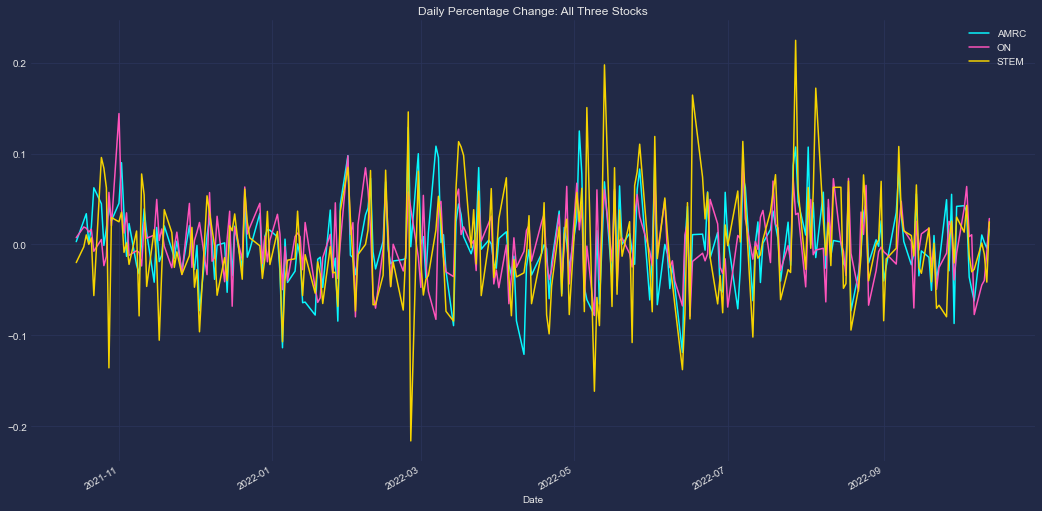

In [45]:
green_stock_returns.plot(figsize=(18,9))
plt.title('Daily Percentage Change: All Three Stocks')

## KDE graph: Daily Percentage Change (present date)

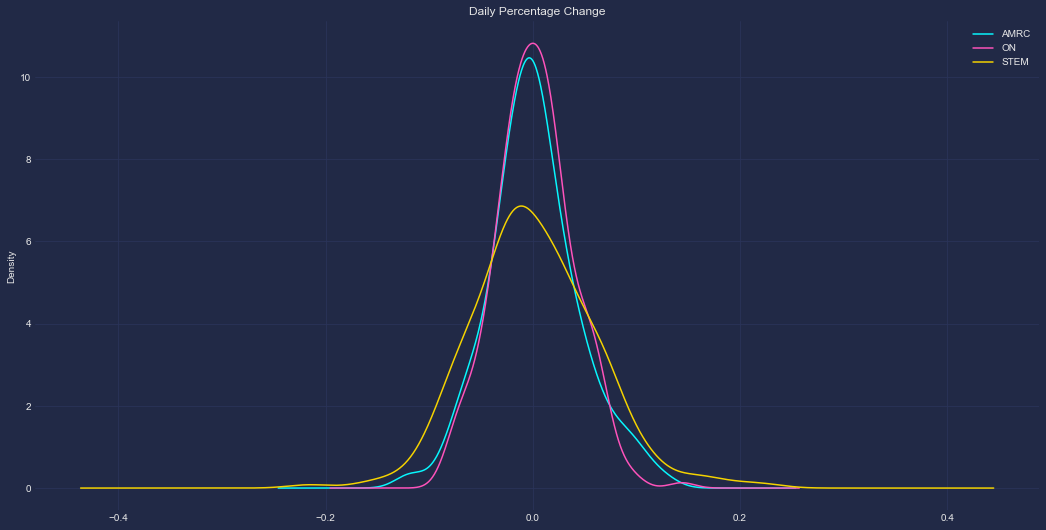

In [46]:
# KDE is normalized, histogram is not. Comparison of the two can be used for verification.

amrc['Daily Percentage Change'].plot(kind='kde', label='AMRC', figsize=(18,9))
on['Daily Percentage Change'].plot(kind='kde', label='ON')
stem['Daily Percentage Change'].plot(kind='kde',label='STEM')
plt.title('Daily Percentage Change')
plt.legend()

## Method 2: Daily Percentage Change using pct_change() formula

In [47]:
# create seperate dataframes for each stocks' closing data
amrc_2 = amrc[['Close']] 
on_2 = on[['Close']]
stem_2 = stem[['Close']]

# transform pct_change() formula onto each dataframe
amrc_2 = amrc_2.pct_change()
on_2 = on_2.pct_change()
stem_2 = stem_2.pct_change()

# combined_dr is all three stocks daily percentage return
combined_dr = pd.concat([amrc_2, on_2, stem_2], axis="columns")
combined_dr.columns = ['AMRC Daily Return', 'ON Daily Return', 'STEM Daily Return']
combined_dr


,AMRC Daily Return,ON Daily Return,STEM Daily Return
Date,,,
2021-09-15,NaN,NaN,NaN
2021-09-16,-0.062991,0.003861,0.061717
2021-09-17,0.013567,-0.010324,0.092671
2021-09-20,-0.051436,-0.024954,-0.062452
2021-09-21,-0.009989,0.000210,0.037007
...,...,...,...
2022-09-09,0.003221,0.015875,0.014851
2022-09-12,-0.022344,0.003209,0.009756
2022-09-13,-0.010127,-0.069958,-0.012681


## Cumulative Return

### Total change in the investment price over a set time: it = (1+rt)it-1


In [48]:
amrc['Cumulative Return'] = (1 + amrc['Daily Percentage Change']).cumprod() - 1 
amrc.head(4)

,High,Low,Open,Close,Volume,Adj Close,Total Traded,MA50,MA100,Daily Percentage Change,Cumulative Return
Date,,,,,,,,,,,
2021-09-15,70.580002,69.080002,70.000000,70.010002,476700,70.010002,3.336900e+07,NaN,NaN,NaN,NaN
2021-09-16,70.599998,65.589996,69.680000,65.599998,439400,65.599998,3.061739e+07,NaN,NaN,-0.062991,-0.062991
2021-09-17,67.669998,65.309998,66.169998,66.489998,868100,66.489998,5.744218e+07,NaN,NaN,0.013567,-0.050279
2021-09-20,65.419998,62.240002,64.949997,63.070000,435900,63.070000,2.831170e+07,NaN,NaN,-0.051436,-0.099129


In [98]:
on['Cumulative Return'] = (1 + on['Daily Percentage Change']).cumprod() - 1 
on.head(4)

,High,Low,Open,Close,Volume,Adj Close,Total Traded,MA50,MA100,Daily Percentage Change,Cumulative Return
Date,,,,,,,,,,,
2021-09-15,49.230000,47.570000,48.240002,49.209999,5534000,49.209999,2.299601e+07,NaN,NaN,NaN,NaN
2021-09-16,49.709999,48.380001,48.930000,49.400002,5785300,49.400002,2.149984e+07,NaN,NaN,0.003861,0.003861
2021-09-17,49.400002,48.090000,49.290001,48.889999,7268000,48.889999,4.278865e+07,NaN,NaN,-0.010324,-0.006503
2021-09-20,47.680000,46.759998,47.310001,47.669998,5472600,47.669998,2.062243e+07,NaN,NaN,-0.024954,-0.031294


In [50]:
stem['Cumulative Return'] = (1 + on['Daily Percentage Change']).cumprod() - 1 
stem.head(4)

,High,Low,Open,Close,Volume,Adj Close,Total Traded,MA50,Daily Percentage Change,Cumulative Return
Date,,,,,,,,,,
2021-09-15,22.459999,21.740,22.250000,22.360001,2374000,22.360001,1.060658e+07,NaN,NaN,NaN
2021-09-16,23.885000,22.045,22.299999,23.740000,2398100,23.740000,9.798620e+06,NaN,0.061717,0.003861
2021-09-17,25.980000,24.090,24.309999,25.940001,8552600,25.940001,2.110351e+07,NaN,0.092671,-0.006503
2021-09-20,25.010000,23.680,24.440001,24.320000,2887600,24.320000,1.065340e+07,NaN,-0.062452,-0.031294


## Method 1: Plotting Cumulative Return (with subplots function)

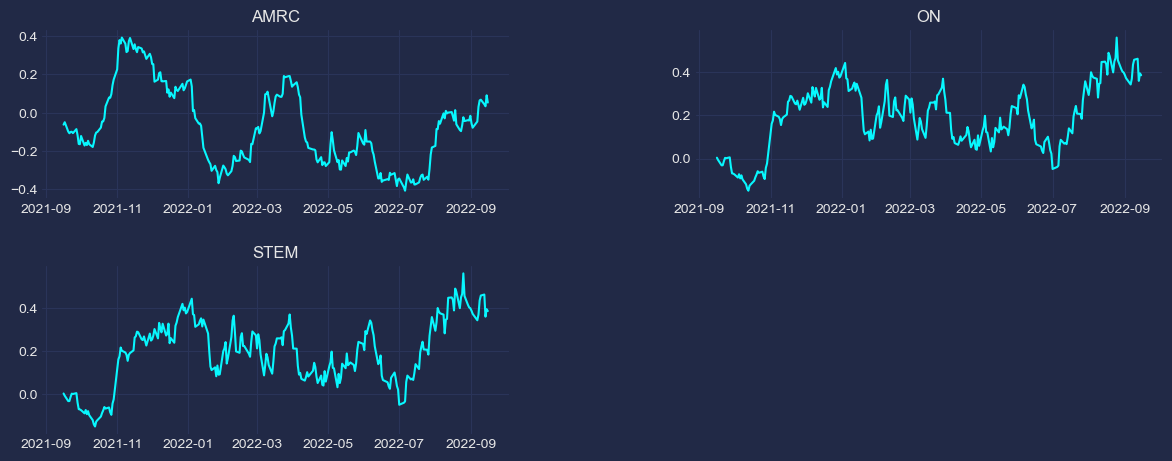

In [211]:
fig = plt.figure()
ax1 = fig.add_subplot(321)
ax2 = fig.add_subplot(322)
ax3 = fig.add_subplot(323)
ax1.plot(amrc['Cumulative Return'])
ax1.set_title("AMRC")
ax2.plot(on['Cumulative Return'])
ax2.set_title("ON")
ax3.plot(stem['Cumulative Return'])
ax3.set_title("STEM")
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)



plt.rcParams["figure.figsize"] = (14,8)

## Portfolio example

In [212]:
# AMRC: Portfolio example with random number of shares of AMRC

# Set initial capital
initial_capital = float(100000)
# Set the share size
share_size = 500
# Take a 500 share position where the dual moving average crossover is 1 (SMA50 >SMA100)
amrc_close['Position'] = share_size * amrc_close['Trading Signal']

# Find the points in time where a 500 share position is bought or sold
amrc_close['Entry/Exit Position'] = amrc_close['Position'].diff()

# Multiply share price by entry/exit positions and get the cumulatively sum
amrc_close['Portfolio Holdings'] = amrc_close['Close'] * amrc_close['Entry/Exit Position'].cumsum()

# Subtract the initial capital by the portfolio holdings to get the amount of liquid cash in the portfolio
amrc_close['Portfolio Cash'] = initial_capital - (amrc_close['Close'] * amrc_close['Entry/Exit Position']).cumsum()

# Get the total portfolio value by adding the cash amount by the portfolio holdings (or investments)
amrc_close['Portfolio Total'] = amrc_close['Portfolio Cash'] + amrc_close['Portfolio Holdings']

# Calculate the portfolio daily returns
amrc_close['Portfolio Daily Percentage Return'] = amrc_close['Portfolio Total'].pct_change()

# Calculate the cumulative returns
amrc_close['Portfolio Cumulative Return'] = (1 + amrc_close['Portfolio Daily Percentage Return']).cumprod() - 1

# Print the DataFrame
amrc_close.tail(8)

,Close,SMA50,SMA100,Trading Signal,Entry/Exit,Position,Entry/Exit Position,Portfolio Holdings,Portfolio Cash,Portfolio Total,Portfolio Daily Percentage Return,Portfolio Cumulative Return
Date,,,,,,,,,,,,
2022-09-06,66.739998,56.923400,55.2875,1.0,0.0,500.0,0.0,33369.998932,67559.999466,100929.998398,0.011323,0.00930
2022-09-07,72.160004,57.409401,55.4184,1.0,0.0,500.0,0.0,36080.001831,67559.999466,103640.001297,0.026850,0.03640
2022-09-08,74.500000,57.990001,55.5926,1.0,0.0,500.0,0.0,37250.000000,67559.999466,104809.999466,0.011289,0.04810
2022-09-09,74.739998,58.623000,55.7750,1.0,0.0,500.0,0.0,37369.998932,67559.999466,104929.998398,0.001145,0.04930
2022-09-12,73.070000,59.173200,55.9409,1.0,0.0,500.0,0.0,36534.999847,67559.999466,104094.999313,-0.007958,0.04095
2022-09-13,72.330002,59.702401,56.1021,1.0,0.0,500.0,0.0,36165.000916,67559.999466,103725.000381,-0.003554,0.03725
2022-09-14,76.339996,60.376800,56.3370,1.0,0.0,500.0,0.0,38169.998169,67559.999466,105729.997635,0.019330,0.05730
2022-09-15,73.699997,61.022800,56.5561,1.0,0.0,500.0,0.0,36849.998474,67559.999466,104409.997940,-0.012485,0.04410


In [54]:
# ON: Portfolio example with random number of shares of AMRC


# Set initial capital
initial_capital = float(100000)
# Set the share size
share_size = 500
# Take a 500 share position where the dual moving average crossover is 1 (SMA50 >SMA100)
on_close['Position'] = share_size * on_close['Trading Signal']

# Find the points in time where a 500 share position is bought or sold
on_close['Entry/Exit Position'] = on_close['Position'].diff()

# Multiply share price by entry/exit positions and get the cumulatively sum
on_close['Portfolio Holdings'] = on_close['Close'] * on_close['Entry/Exit Position'].cumsum()

# Subtract the initial capital by the portfolio holdings to get the amount of liquid cash in the portfolio
on_close['Portfolio Cash'] = initial_capital - (on_close['Close'] * on_close['Entry/Exit Position']).cumsum()

# Get the total portfolio value by adding the cash amount by the portfolio holdings (or investments)
on_close['Portfolio Total'] = on_close['Portfolio Cash'] + on_close['Portfolio Holdings']

# Calculate the portfolio daily returns
on_close['Portfolio Daily Percentage Return'] = on_close['Portfolio Total'].pct_change()

# Calculate the cumulative returns
on_close['Portfolio Cumulative Return'] = (1 + on_close['Portfolio Daily Percentage Return']).cumprod() - 1

# Print the DataFrame
on_close.tail(8)

,Close,SMA50,SMA100,Trading Signal,Entry/Exit,Position,Entry/Exit Position,Portfolio Holdings,Portfolio Cash,Portfolio Total,Portfolio Daily Percentage Return,Portfolio Cumulative Return
Date,,,,,,,,,,,,
2022-09-06,66.050003,62.4558,59.2813,1.0,0.0,500.0,0.0,33025.001526,69515.001297,102540.002823,-0.007069,0.02540
2022-09-07,67.360001,62.7196,59.4124,1.0,0.0,500.0,0.0,33680.000305,69515.001297,103195.001602,0.006388,0.03195
2022-09-08,70.550003,63.0744,59.5853,1.0,0.0,500.0,0.0,35275.001526,69515.001297,104790.002823,0.015456,0.04790
2022-09-09,71.669998,63.4854,59.7563,1.0,0.0,500.0,0.0,35834.999084,69515.001297,105350.000381,0.005344,0.05350
2022-09-12,71.900002,63.9172,59.9115,1.0,0.0,500.0,0.0,35950.000763,69515.001297,105465.002060,0.001092,0.05465
2022-09-13,66.870003,64.3178,60.0262,1.0,0.0,500.0,0.0,33435.001373,69515.001297,102950.002670,-0.023847,0.02950
2022-09-14,68.570000,64.7432,60.1793,1.0,0.0,500.0,0.0,34284.999847,69515.001297,103800.001144,0.008256,0.03800
2022-09-15,68.150002,65.1540,60.3430,1.0,0.0,500.0,0.0,34075.000763,69515.001297,103590.002060,-0.002023,0.03590


In [55]:
# STEM: Portfolio example with random number of shares of AMRC


# Set initial capital
initial_capital = float(100000)
# Set the share size
share_size = 500
# Take a 500 share position where the dual moving average crossover is 1 (SMA50 >SMA100)
stem_close['Position'] = share_size * stem_close['Trading Signal']

# Find the points in time where a 500 share position is bought or sold
stem_close['Entry/Exit Position'] = stem_close['Position'].diff()

# Multiply share price by entry/exit positions and get the cumulatively sum
stem_close['Portfolio Holdings'] = stem_close['Close'] * stem_close['Entry/Exit Position'].cumsum()

# Subtract the initial capital by the portfolio holdings to get the amount of liquid cash in the portfolio
stem_close['Portfolio Cash'] = initial_capital - (stem_close['Close'] * stem_close['Entry/Exit Position']).cumsum()

# Get the total portfolio value by adding the cash amount by the portfolio holdings (or investments)
stem_close['Portfolio Total'] = stem_close['Portfolio Cash'] + stem_close['Portfolio Holdings']

# Calculate the portfolio daily returns
stem_close['Portfolio Daily Percentage Return'] = stem_close['Portfolio Total'].pct_change()

# Calculate the cumulative returns
stem_close['Portfolio Cumulative Return'] = (1 + stem_close['Portfolio Daily Percentage Return']).cumprod() - 1

# Print the DataFrame
stem_close.tail(8)

,Close,SMA50,SMA100,Trading Signal,Entry/Exit,Position,Entry/Exit Position,Portfolio Holdings,Portfolio Cash,Portfolio Total,Portfolio Daily Percentage Return,Portfolio Cumulative Return
Date,,,,,,,,,,,,
2022-09-06,14.110000,11.4622,9.7237,1.0,0.0,500.0,0.0,7054.999828,92494.999886,99549.999714,-0.000301,-0.00450
2022-09-07,15.630000,11.6178,9.7788,1.0,0.0,500.0,0.0,7815.000057,92494.999886,100309.999943,0.007634,0.00310
2022-09-08,16.160000,11.7894,9.8458,1.0,0.0,500.0,0.0,8079.999924,92494.999886,100574.999809,0.002642,0.00575
2022-09-09,16.400000,11.9772,9.9161,1.0,0.0,500.0,0.0,8199.999809,92494.999886,100694.999695,0.001193,0.00695
2022-09-12,16.559999,12.1652,9.9837,1.0,0.0,500.0,0.0,8279.999733,92494.999886,100774.999619,0.000794,0.00775
2022-09-13,16.350000,12.3492,10.0568,1.0,0.0,500.0,0.0,8175.000191,92494.999886,100670.000076,-0.001042,0.00670
2022-09-14,17.420000,12.5462,10.1495,1.0,0.0,500.0,0.0,8710.000038,92494.999886,101204.999924,0.005314,0.01205
2022-09-15,16.980000,12.7340,10.2415,1.0,0.0,500.0,0.0,8489.999771,92494.999886,100984.999657,-0.002174,0.00985


## Plotting Cumulative Return on Portfolio Example

Text(0.5, 1.0, 'Portfolio Cumulative Return for AMRC')

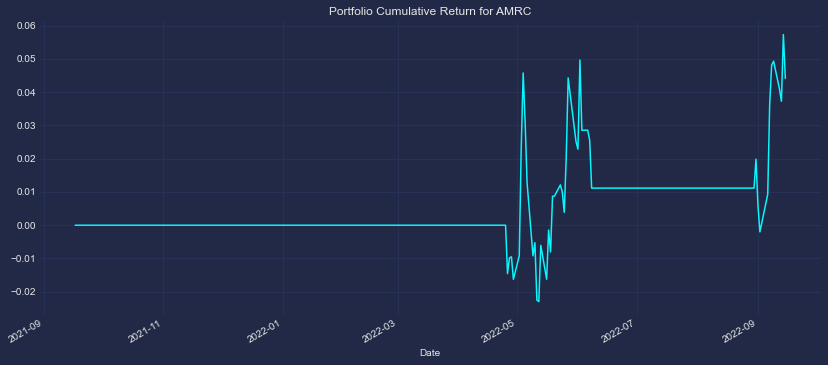

In [56]:
amrc_close['Portfolio Cumulative Return'].plot(figsize = (14,6))
plt.title('Portfolio Cumulative Return for AMRC')

Text(0.5, 1.0, 'Portfolio Cumulative Return for ON')

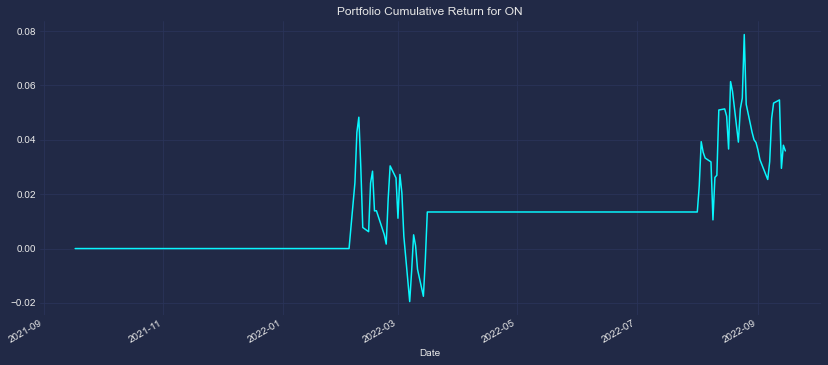

In [57]:
on_close['Portfolio Cumulative Return'].plot(figsize = (14,6))
plt.title('Portfolio Cumulative Return for ON')

Text(0.5, 1.0, 'Portfolio Cumulative Return for STEM')

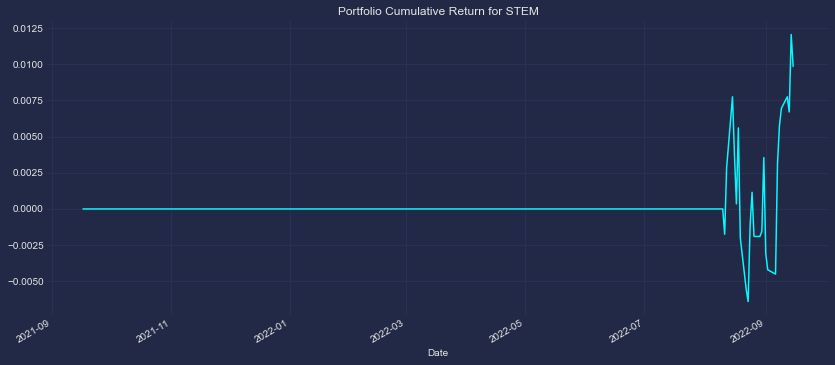

In [58]:
stem_close['Portfolio Cumulative Return'].plot(figsize = (14,6))
plt.title('Portfolio Cumulative Return for STEM')

## Exit position visualization with HVPlot package

In [213]:
# visualize exit positions relative to portfolio (not close price, this is more specific to what you have)

exit = amrc_close[amrc_close['Entry/Exit'] == -1.0]['Portfolio Total'].hvplot.scatter(
    color='red',
    legend=False,
    ylabel='Total Portfolio Value',
    width=1000,
    height=400
)
# Visualize entry position relative to total portfolio value
entry = amrc_close[amrc_close['Entry/Exit'] == 1.0]['Portfolio Total'].hvplot.scatter(
    color='green',
    legend=False,
    ylabel='Total Portfolio Value',
    width=1000,
    height=400
)
# Visualize total portoflio value for the investment
total_portfolio_value = amrc_close[['Portfolio Total']].hvplot(
    line_color='lightgray',
    ylabel='Total Portfolio Value',
    width=1000,
    height=400
)
# Overlay plots
portfolio_entry_exit_plot = total_portfolio_value * entry * exit
portfolio_entry_exit_plot.opts(xaxis=None)

:Overlay
   .Curve.I                    :Curve   [Date]   (Portfolio Total)
   .Scatter.Portfolio_Total.I  :Scatter   [Date]   (Portfolio Total)
   .Scatter.Portfolio_Total.II :Scatter   [Date]   (Portfolio Total)

## Correlation and scatter matrix

,AMRC Open,ON Open,STEM Open
Date,,,
2021-09-15,70.000000,48.240002,22.250000
2021-09-16,69.680000,48.930000,22.299999
2021-09-17,66.169998,49.290001,24.309999
2021-09-20,64.949997,47.310001,24.440001
2021-09-21,63.860001,48.180000,24.420000


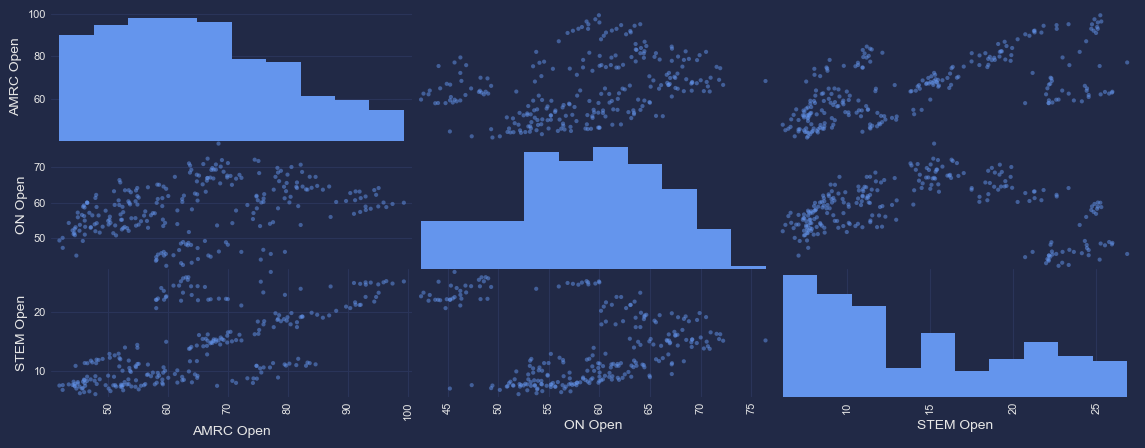

In [216]:
# Create combined stock dataframe for scatter matrix on 'Open' data 
corr_scatter_df = pd.concat([amrc['Open'], on['Open'], stem['Open']], axis=1)
corr_scatter_df.columns = ['AMRC Open', 'ON Open', 'STEM Open']
pd.plotting.scatter_matrix(corr_scatter_df, figsize=(14,5), color='cornflowerblue', hist_kwds={'color':['cornflowerblue']})
corr_scatter_df.head()

array([[<AxesSubplot:xlabel='AMRC Open', ylabel='AMRC Open'>,
        <AxesSubplot:xlabel='ON Open', ylabel='AMRC Open'>,
        <AxesSubplot:xlabel='STEM Open', ylabel='AMRC Open'>],
       [<AxesSubplot:xlabel='AMRC Open', ylabel='ON Open'>,
        <AxesSubplot:xlabel='ON Open', ylabel='ON Open'>,
        <AxesSubplot:xlabel='STEM Open', ylabel='ON Open'>],
       [<AxesSubplot:xlabel='AMRC Open', ylabel='STEM Open'>,
        <AxesSubplot:xlabel='ON Open', ylabel='STEM Open'>,
        <AxesSubplot:xlabel='STEM Open', ylabel='STEM Open'>]],
      dtype=object)

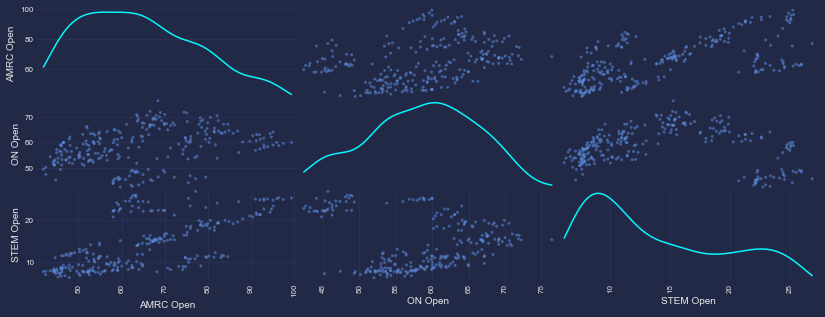

In [63]:
# Scatter Matrix on 'Open' Data with density plot integrated (KDE)
pd.plotting.scatter_matrix(corr_scatter_df, diagonal='kde', figsize=(14,5), color='cornflowerblue')

## Setting up combined dataframe for backtest

In [64]:
# Backtest on combined (combined df of three stocks at 'Close'). Multiplied by 252 trading days for annualized data.

combined_dr = combined_dr.dropna()
combined_dr.columns = ['AMRC', 'ON', 'STEM']
combined_dr.std() * np.sqrt(252)

AMRC    0.684715
ON      0.584907
STEM    0.962752
dtype: float64

## Correlation table on backtest dataframe
### Combined daily return of all 3 stocks

In [65]:
correlation_df = combined_dr.corr()
correlation_df.style.background_gradient(cmap="coolwarm")

,AMRC,ON,STEM
AMRC,1.000000,0.529935,0.622751
ON,0.529935,1.000000,0.452397
STEM,0.622751,0.452397,1.000000


<AxesSubplot:title={'center':'Exponentially Weighted Average'}, xlabel='Date'>

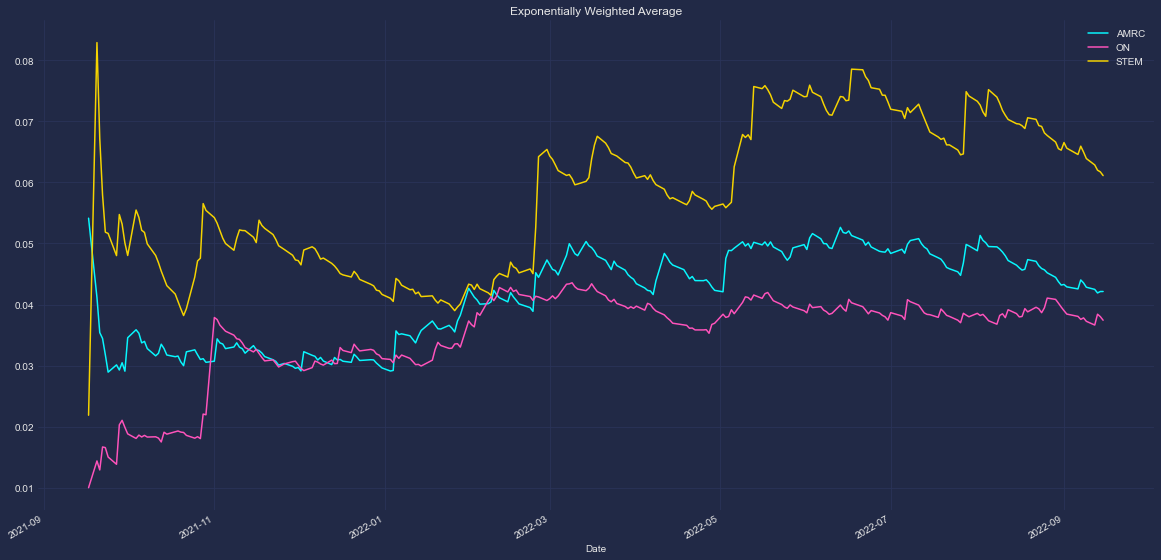

In [66]:
combined_dr.ewm(halflife=21).std().plot(figsize=(20, 10), title="Exponentially Weighted Average")

## Annualized Sharpe Ratios

### Technical analysis tool used to compare an investment to a risk-free asset (after adjusting for its risk).

### Or simply, risk-adjusted return: how much excess return you receive for the volatility of having a risky asset.

### A sharpe ratio over 1.0 is considered good.

In [67]:
sharpe_ratios = (combined_dr.mean() * 252) / (combined_dr.std() * np.sqrt(252))
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.hvplot.barh(title="Sharpe Ratios", color= 'blue')

:Bars   [index]   (0)

### ON is a riskier asset, but its annualized sharpe ratio is very close to 1.0. STEM, has the lowest S.R.
### A low sharpe ratio indicates poor returns compared to what you could get if you allocated towards better investments.
### Although some investments can go up 10% in 1 month, and 15% down the next with a higher overall average returm, some investors may not like this.

## Backtest for Annual Metrics

In [68]:
metrics = [
    'Annual Return',
    'Cumulative Returns',
    'Annual Volatility',
    'Sharpe Ratio',
    'Sortino Ratio']
columns = ['Backtest']
# Initialize the DataFrame with index set to evaluation metrics and column as `Backtest` (just like PyFolio)
portfolio_evaluation_df = pd.DataFrame(index=metrics, columns=columns)
portfolio_evaluation_df


,Backtest
Annual Return,NaN
Cumulative Returns,NaN
Annual Volatility,NaN
Sharpe Ratio,NaN
Sortino Ratio,NaN


In [69]:
# dataframe for annual metrics
metrics = [
    'AMRC Annual Return', 'ON Annual Return', 'STEM Annual Return', 'AMRC Annual Volatility','ON Annual Volatility','STEM Annual Volatility',
    'AMRC Sharpe Ratio','ON Sharpe Ratio','STEM Sharpe Ratio']
columns = ['Backtest']
# index set to initialize annual metrics and column as 'Backtest'.

backtest_final = pd.DataFrame(index=metrics, columns=columns)
backtest_final

,Backtest
AMRC Annual Return,NaN
ON Annual Return,NaN
STEM Annual Return,NaN
AMRC Annual Volatility,NaN
ON Annual Volatility,NaN
STEM Annual Volatility,NaN
AMRC Sharpe Ratio,NaN
ON Sharpe Ratio,NaN
STEM Sharpe Ratio,NaN


In [70]:
# Calculate cumulative return for AMRC
portfolio_evaluation_df.loc['Cumulative Returns'] = amrc_close['Portfolio Cumulative Return'][-1]
# Calculate annualized return
portfolio_evaluation_df.loc['Annual Return'] = (
    amrc_close['Portfolio Daily Percentage Return'].mean() * 252
)
# Calculate annual volatility
portfolio_evaluation_df.loc['Annual Volatility'] = (
    amrc_close['Portfolio Daily Percentage Return'].std() * np.sqrt(252)
)
# Calculate Sharpe Ratio
portfolio_evaluation_df.loc['Sharpe Ratio'] = (
    amrc_close['Portfolio Daily Percentage Return'].mean() * 252) / (
    amrc_close['Portfolio Daily Percentage Return'].std() * np.sqrt(252)
)
# Calculate Downside Return
sortino_ratio_df = amrc_close[['Portfolio Daily Percentage Return']].copy()
sortino_ratio_df.loc[:,'Downside Returns'] = 0
target = 0
mask = sortino_ratio_df['Portfolio Daily Percentage Return'] < target
sortino_ratio_df.loc[mask, 'Downside Returns'] = sortino_ratio_df['Portfolio Daily Percentage Return']**2
portfolio_evaluation_df
# Calculate Sortino Ratio
down_stdev = np.sqrt(sortino_ratio_df['Downside Returns'].mean()) * np.sqrt(252)
expected_return = sortino_ratio_df['Portfolio Daily Percentage Return'].mean() * 252
sortino_ratio = expected_return/down_stdev
portfolio_evaluation_df.loc['Sortino Ratio'] = sortino_ratio
portfolio_evaluation_df.head()

# repeat for ON and STEM

,Backtest
Annual Return,0.047598
Cumulative Returns,0.0441
Annual Volatility,0.092815
Sharpe Ratio,0.512826
Sortino Ratio,0.848753


In [71]:
# Calculate annualized return

backtest_final.loc['AMRC Annual Return'] = combined_dr['AMRC'].std() * np.sqrt(252)
backtest_final.loc['ON Annual Return'] = combined_dr['ON'].std() * np.sqrt(252)
backtest_final.loc['STEM Annual Return'] = combined_dr['STEM'].std() * np.sqrt(252)

backtest_final.loc['AMRC Annual Volatility'] = combined_dr['AMRC'].std() * np.sqrt(252)
backtest_final.loc['ON Annual Volatility'] = combined_dr['ON'].std() * np.sqrt(252)
backtest_final.loc['STEM Annual Volatility'] = combined_dr['STEM'].std() * np.sqrt(252)

# Calculate Sharpe Ratio
backtest_final.loc['AMRC Sharpe Ratio'] = sharpe_ratios['AMRC']
backtest_final.loc['ON Sharpe Ratio'] = sharpe_ratios['ON']
backtest_final.loc['STEM Sharpe Ratio'] = sharpe_ratios['STEM']

backtest_final

,Backtest
AMRC Annual Return,0.684715
ON Annual Return,0.584907
STEM Annual Return,0.962752
AMRC Annual Volatility,0.684715
ON Annual Volatility,0.584907
STEM Annual Volatility,0.962752
AMRC Sharpe Ratio,0.414263
ON Sharpe Ratio,0.846558
STEM Sharpe Ratio,0.191175


In [72]:
backtest_final.reset_index(inplace=True)
backtest_final

,index,Backtest
0,AMRC Annual Return,0.684715
1,ON Annual Return,0.584907
2,STEM Annual Return,0.962752
3,AMRC Annual Volatility,0.684715
4,ON Annual Volatility,0.584907
5,STEM Annual Volatility,0.962752
6,AMRC Sharpe Ratio,0.414263
7,ON Sharpe Ratio,0.846558
8,STEM Sharpe Ratio,0.191175


## Backtest Final Table: Annual Volatility, Annual Sharpe Ratio, Annual Return
### Click either index or backtest to interact with table.

In [73]:
backtest_final_table = backtest_final.hvplot.table()
backtest_final_table

:Table   [index,Backtest]

#### STEM has the highest annual return of 0.96. ON has the lowest annual return of 0.58.
#### STEM has the highest annual volatility of 0.96. ON has the lowest annual volatility of 0.58.
#### ON has the highest sharpe ratio of 0.87. STEM has the lowest sharpe ratio of 0.12.

#### Highest annual return: 0.96,  STEM.
#### Lowest annual return: 0.58, ON.
#### Highest annual volatility: 0.96, STEM
